# Zero-energy null geodesics  in Kerr spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

In [1]:
version()

'SageMath version 9.2.rc3, Release Date: 2020-10-18'

In [2]:
%display latex

In [3]:
a = 0.9

In [4]:
r_min(L) = 1 - sqrt(1 - a^2/(1 + L^2))
r_min

L |--> -sqrt(-0.810000000000000/(L^2 + 1) + 1) + 1

In [5]:
r_max(L) = 1 + sqrt(1 - a^2/(1 + L^2))
r_max

L |--> sqrt(-0.810000000000000/(L^2 + 1) + 1) + 1

In [6]:
th_min(L) = atan(-L)
th_max(L) = pi - th_min(L)

## $r$ as a function of $\theta$

In [7]:
def rf(th, K, L, s):
    b = sqrt(1 - a^2/(1 + L^2))
    return 1 + b*sin(K - s*arcsin(sqrt(1 + L^2)*cos(th)))

In [8]:
def Kf(rm, L, s):
    return n(arcsin((rm - 1)/sqrt(1 - a^2/(1 + L^2))) + s*pi/2)

In [9]:
L1 = -1
r_min(L1), r_max(L1)

(0.228637568972924, 1.77136243102708)

In [10]:
n(th_min(L1)), n(th_max(L1))

(0.785398163397448, 2.35619449019234)

## Plot in O'Neill coordinates
$$ x = e^{r/m}\sin\theta$$
$$ y = e^{r/m}\cos\theta$$

In [11]:
def plot_geod(L1, rm):
    K1 = Kf(rm, L1, 1)
    K2 = Kf(rm, L1, -1)
    xx = lambda th: exp(rf(th, K1, L1, 1))*sin(th)
    yy = lambda th: exp(rf(th, K1, L1, 1))*cos(th)
    g = parametric_plot((xx, yy), (th_min(L1), th_max(L1)), 
                        thickness=2., color='green')
    xx = lambda th: exp(rf(th, K2, L1, -1))*sin(th)
    yy = lambda th: exp(rf(th, K2, L1, -1))*cos(th)
    g += parametric_plot((xx, yy), (th_min(L1), th_max(L1)), 
                         thickness=2., color='green')
    xx = lambda th: -exp(rf(th, K1, L1, 1))*sin(th)
    yy = lambda th: exp(rf(th, K1, L1, 1))*cos(th)
    g += parametric_plot((xx, yy), (th_min(L1), th_max(L1)), 
                        thickness=2., color='green')
    xx = lambda th: -exp(rf(th, K2, L1, -1))*sin(th)
    yy = lambda th: exp(rf(th, K2, L1, -1))*cos(th)
    g += parametric_plot((xx, yy), (th_min(L1), th_max(L1)), 
                         thickness=2., color='green')
    return g

In [12]:
def plot_arrow(L1, rm, th, dth, s):
    K1 = Kf(rm, L1, s)
    x1 = n(exp(rf(th, K1, L1, s))*sin(th))
    y1 = n(exp(rf(th, K1, L1, s))*cos(th))
    th2 = th + dth
    x2 = n(exp(rf(th2, K1, L1, s))*sin(th2))
    y2 = n(exp(rf(th2, K1, L1, s))*cos(th2))
    v = vector([x2 - x1, y2 - y1])
    g = v.plot(start=(x1, y1), color='green')
    x1 = -x1
    x2 = - x2 
    v = vector([x2 - x1, y2 - y1])
    g += v.plot(start=(x1, y1), color='green')
    return g

In [13]:
g = plot_geod(-1, 1.5)

In [14]:
rp = 1 + sqrt(1 - a^2)
rm = 1 - sqrt(1 - a^2)
rp, rm

(1.43588989435407, 0.564110105645933)

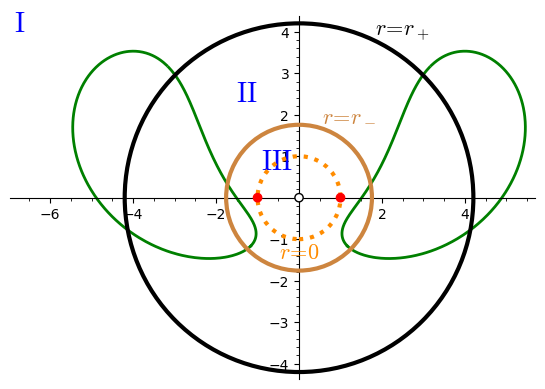

In [15]:
Rp = exp(rp)
Rm = exp(rm)
Hp = circle((0,0), Rp, color='black', thickness=3) + \
     text(r'$r\!=\!r_+$', (2.5, 4.), color='black', fontsize=16)
Hm = circle((0,0), Rm, color='peru', thickness=3) + \
     text(r'$r\!=\!r_-$', (1.2, 2.), color='peru', fontsize=16)
R0 = circle((0,0), 1, color='darkorange', linestyle='dotted', thickness=3) + \
      text(r'$r\!=\!0$', (0,-1.3), color='darkorange', fontsize=16)
#R0 = circle((0,0), 1, color='darkorange', linestyle='dotted', thickness=3) + \
#      text(r'$r\!=\!0$', (0,-1.3), color='darkorange', background_color='white', fontsize=16)
sing = circle((1,0), 0.1, color='red', fill=True) + \
       circle((-1,0), 0.1, color='red', fill=True)
rminf = circle((0,0), 0.1, edgecolor='black', facecolor='white', fill=True)
region_label = text(r'${\rm I}$', (-1.6*Rp, Rp), fontsize=20) + \
               text(r'${\rm II}$', (-0.3*Rp, 0.6*Rp), fontsize=20) + \
               text(r'${\rm III}$', (-0.3*Rm, 0.5*Rm), fontsize=20)
g += Hp + Hm + R0 + sing + rminf + region_label
g

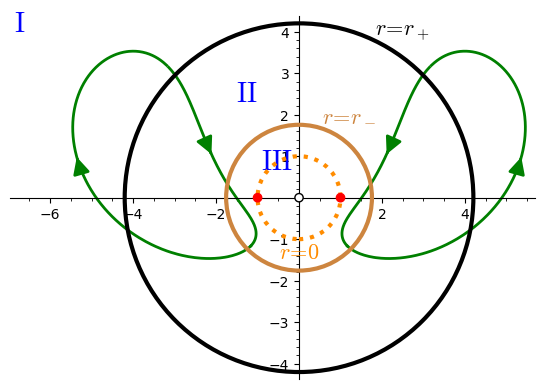

In [16]:
g += plot_arrow(-1, 1.5, 1.4, -0.01, 1)
g += plot_arrow(-1, 1.5, 1.1, 0.01, -1)
g

## Plot of the ergoregion

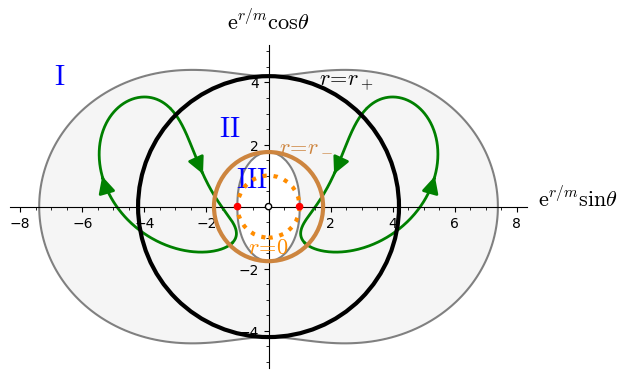

In [17]:
x,y = var('x y')
r = 1/2*ln(x^2 + y^2)
costh2 = y^2/(x^2+y^2)
f_ergo = r^2 - 2*r + a^2*costh2
ergo = region_plot(f_ergo < 0, (x,-8, 8), (y, -5, 5), incol='whitesmoke', 
                   bordercol='grey',
                   axes_labels=[r'$\mathrm{e}^{r/m}\sin\theta$', 
                                r'$\mathrm{e}^{r/m}\cos\theta$'])
g += ergo
g

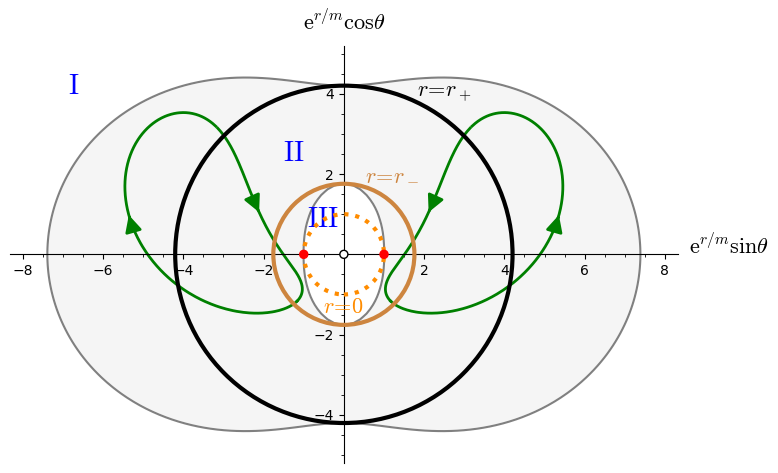

In [18]:
show(g, figsize=7.5)

In [19]:
g.save("gik_zero_ener_merid.pdf", figsize=7.5)